# GROUP-3
#MD Fakrul Islam (613839)
#Adama Daffeh (613827) 
#Raj Kumar Thapa (613819)
#Adane Nigus (112351) 

In [1]:
import cv2
import os
import numpy as np
from keras.models import load_model, Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import matplotlib.image as mpimg

%matplotlib inline
print('Done')

Done


In [2]:
def get_model(layer='fc2'):
  base_model = VGG16(weights='imagenet', include_top=True)
  model = Model(inputs=base_model.input,
                outputs=base_model.get_layer(layer).output)
  return model
print('get_model executed')

get_model executed


In [3]:
def get_files(path_to_files, size):
  fn_imgs = []
  files = [file for file in os.listdir(path_to_files)]
  for file in files:
      img = cv2.resize(cv2.imread(path_to_files+file), size)
  #         img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)[1]
      fn_imgs.append([file, img])
  return dict(fn_imgs)
print('get_files executed')

get_files executed


In [4]:
def feature_vector(img_arr, model):
  if img_arr.shape[2] == 1:
    img_arr = img_arr.repeat(3, axis=2)

  # (1, 224, 224, 3)
  arr4d = np.expand_dims(img_arr, axis=0)  
  arr4d_pp = preprocess_input(arr4d)
  return model.predict(arr4d_pp)[0,:]
print('feature_vector executed')

feature_vector executed


In [5]:
def feature_vectors(imgs_dict, model):
  f_vect = {}
  for fn, img in imgs_dict.items():
    f_vect[fn] = feature_vector(img, model)
  return f_vect
print('feature_vectors executed')

feature_vectors executed


In [6]:
imgs_dict = get_files(path_to_files = 'F:/machine_learning_project/all/',size = (224, 224))

# Create Keras NN model.
model = get_model()

img_feature_vector = feature_vectors(imgs_dict, model)

images = list(img_feature_vector.values())
fns = list(img_feature_vector.keys())
sum_of_squared_distances = []
print('This cell is executed')

553467904/553467096 [==============================] - 48s 0us/step
This cell is executed


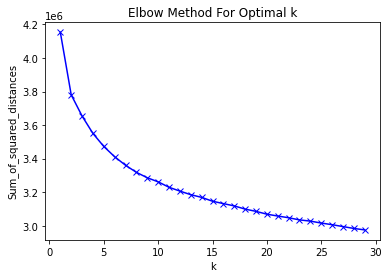

In [7]:
K = range(1, 30)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(images)
  sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [8]:
print(sum_of_squared_distances)

[4153321.7834395617, 3780549.348271049, 3654009.6068762685, 3550174.947022354, 3472523.349011112, 3411161.3335202867, 3360369.0780880777, 3318329.9779904587, 3285968.3890759256, 3261667.924926609, 3229352.692824249, 3206483.981283795, 3185182.3399205273, 3169133.053799655, 3146177.0397258094, 3131938.193929818, 3118281.016296489, 3099200.2045129277, 3085780.333960701, 3068956.7714325613, 3057918.215225199, 3047784.5711738323, 3034871.5031818296, 3027632.026290597, 3016091.8433189923, 3006335.117797147, 2995065.9461877015, 2984043.4785269187, 2975169.006448931]


In [9]:
#n_clusters=3
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(images)
y_kmeans = kmeans.predict(images)
file_names = list(imgs_dict.keys())

n_clusters = 5
cluster_path = 'F:/machine_learning_project/cluster/'
path_to_files = 'F:/machine_learning_project/all/'
print('Done')

Done


In [10]:
for c in range(0,n_clusters):
  if not os.path.exists(cluster_path+'cluster_'+str(c)):
    os.mkdir(cluster_path+'cluster_'+str(c))
    
for fn, cluster in zip(file_names, y_kmeans):
  image = cv2.imread(path_to_files+fn)
  cv2.imwrite(cluster_path+'cluster_'+str(cluster)+'/'+fn, image)

print('Done')

Done


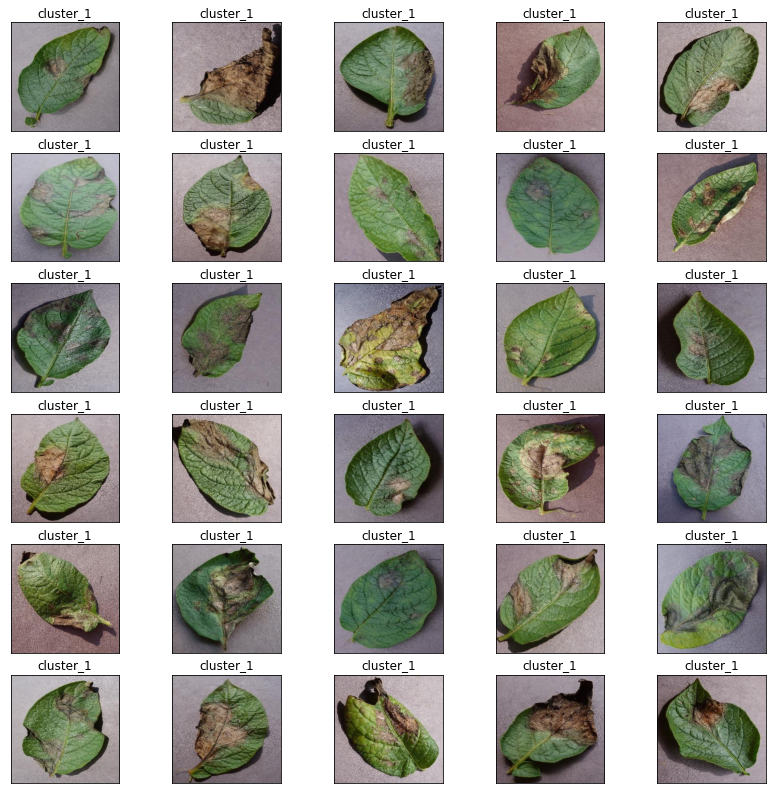

In [11]:
fig = plt.figure(figsize=(14, 14))

cluster_path = 'F:/machine_learning_project/cluster/cluster_0/'
images = [file for file in os.listdir(cluster_path)]

for cnt, data in enumerate(images[1:31]):
#     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(cluster_path+data)
    y.imshow(img)
    plt.title('cluster_1')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)


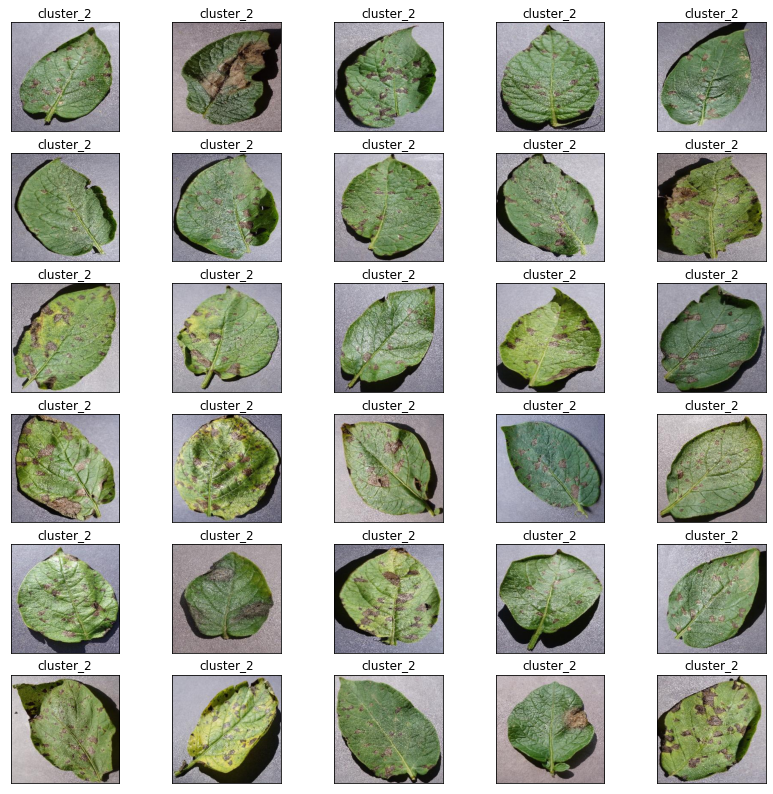

In [12]:
fig = plt.figure(figsize=(14, 14))

cluster_path = 'F:/machine_learning_project/cluster/cluster_1/'
images = [file for file in os.listdir(cluster_path)]

for cnt, data in enumerate(images[1:31]):
#     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(cluster_path+data)
    y.imshow(img)
    plt.title('cluster_2')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

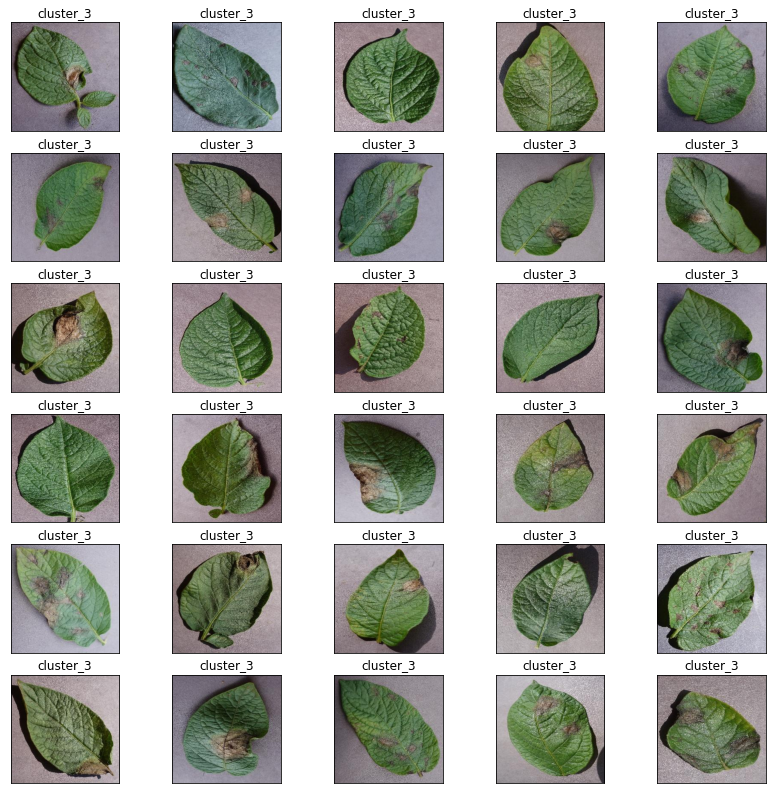

In [13]:
fig = plt.figure(figsize=(14, 14))

cluster_path = 'F:/machine_learning_project/cluster/cluster_2/'
images = [file for file in os.listdir(cluster_path)]

for cnt, data in enumerate(images[1:31]):
#     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(cluster_path+data)
    y.imshow(img)
    plt.title('cluster_3')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

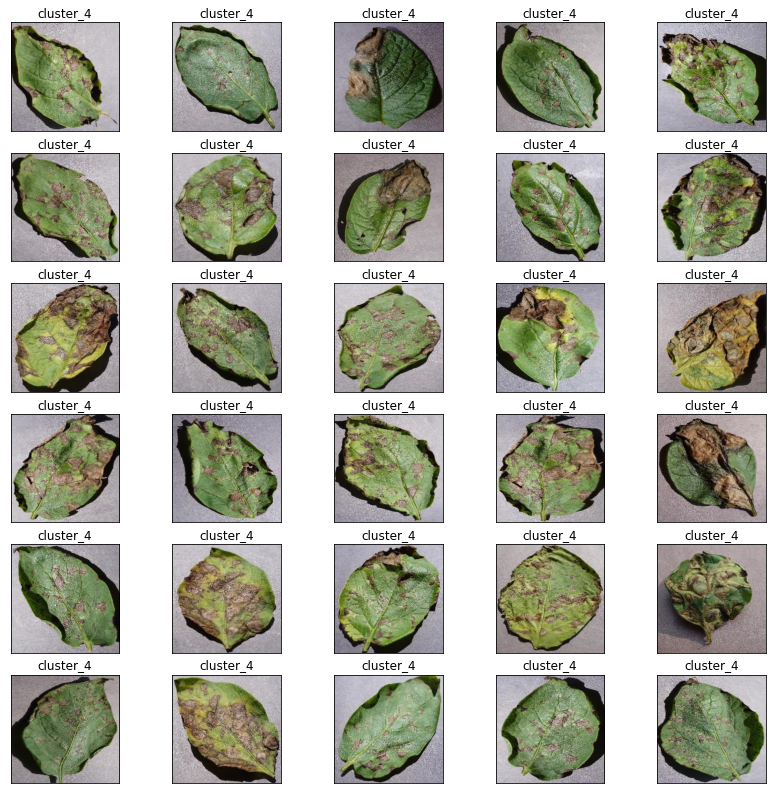

In [14]:
fig = plt.figure(figsize=(14, 14))

cluster_path = 'F:/machine_learning_project/cluster/cluster_3/'
images = [file for file in os.listdir(cluster_path)]

for cnt, data in enumerate(images[1:31]):
#     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(cluster_path+data)
    y.imshow(img)
    plt.title('cluster_4')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

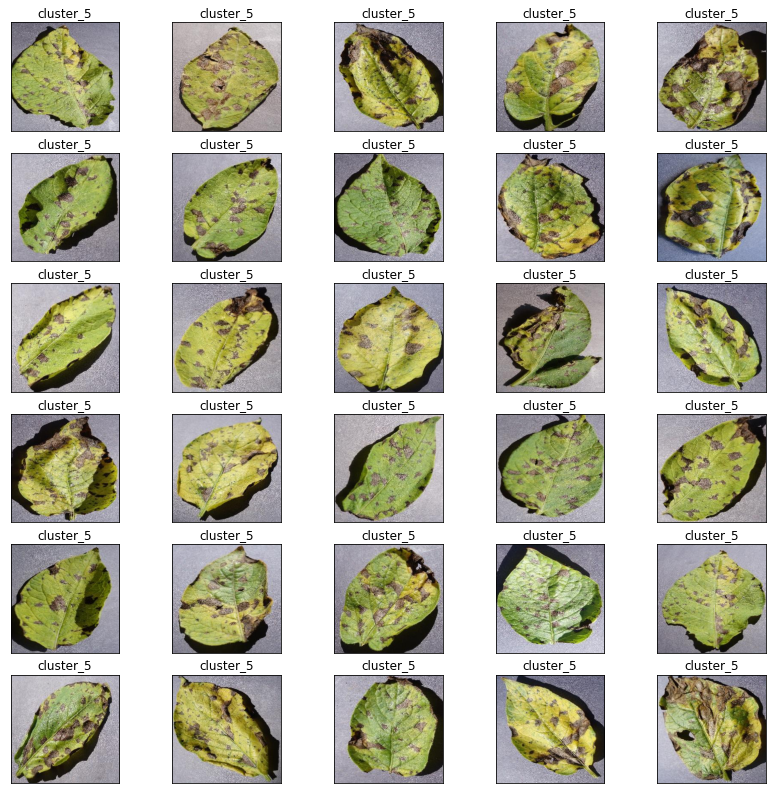

In [15]:
fig = plt.figure(figsize=(14, 14))

cluster_path = 'F:/machine_learning_project/cluster/cluster_4/'
images = [file for file in os.listdir(cluster_path)]

for cnt, data in enumerate(images[1:31]):
#     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(cluster_path+data)
    y.imshow(img)
    plt.title('cluster_5')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)